<font color='RED'>
    
# librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Activation
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import plot_model
from keras import initializers
from keras import optimizers
import tensorflow as tf
import networkx as nx
from pandas.core.common import flatten

Using TensorFlow backend.
/Users/alexanderaguirre/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/alexanderaguirre/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/alexanderaguirre/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/alex

<font color='RED'>
    
# DATAFRAME

In [2]:
dfx = pd.read_csv('df_var_x.csv')
dfy = pd.read_csv('df_var_y.csv')

#QUITO TICKERS Y FECHAS
df_x=dfx.drop(['Ticker', 'Fecha'], axis=1)
df_y=dfy.drop(['Ticker', 'Fecha'], axis=1)

#print(df_x.head(15)) #PRIMEROS 15 ELEMENTOS
#print(df_y.head(15)) #PRIMEROS 15 ELEMENTOS

<font color='RED'>
    
# DATOS ESTADÍSTICOS

In [3]:
#print(df_x.describe())
#print(df_y.describe())

In [4]:
columnas=df_x.columns
t = PrettyTable(['columna','variable independiente'])
for i in range(len(columnas)):
    t.add_row([i,columnas[i]])
print(t)

+---------+---------------------------+
| columna |   variable independiente  |
+---------+---------------------------+
|    0    |          Volumen          |
|    1    |            PER            |
|    2    |      Cambio(%) 1_min      |
|    3    |      Cambio(%) 5_min      |
|    4    |      Cambio(%) 15_min     |
|    5    |       Cambio(%) 1_hr      |
|    6    |       Cambio(%) 4_hr      |
|    7    |      Cambio(%) 1_sem      |
|    8    |      Cambio(%) 1_mes      |
|    9    |     Cambio(%) 3_meses     |
|    10   |     Cambio(%) 6_meses     |
|    11   |      Cambio(%) 1_año      |
|    12   |        Volatilidad        |
|    13   | valoracion de osciladores |
|    14   |            ADX            |
|    15   |             AO            |
|    16   |            ATR            |
|    17   |           CCI20           |
|    18   |         Nivel MACD        |
|    19   |         Señal MACD        |
|    20   |          Momento          |
|    21   |            RSI            |


<font color='RED'>
    
# REORDENAMIENTO

In [5]:
df_x = df_x.sample(frac=1)
df_y = df_y.sample(frac=1)

t = PrettyTable(['valores NaN en df_x','valores NaN en df_y'])
t.add_row([np.any(np.isnan(df_x)),np.any(np.isnan(df_y))])
print(t)

t = PrettyTable(['# de  NaN  en df_x','# de  NaN  en df_y'])
t.add_row([df_x.isnull().sum().sum(),df_y.isnull().sum().sum()])
print(t)

#INDICE DE VALORES CON NAN
idx, idy = np.where(pd.isnull(df_x))
result = np.column_stack([df_x.index[idx], df_x.columns[idy]])
print(result)
a=0
for i in idx:
    print(a,df_x.iloc[i][idy[a]])
    a+=1

print('----------Delete NaN Values-----------------')
df_y=df_y.drop(df_x.index[idx],axis=0)
df_x=df_x.drop(df_x.index[idx],axis=0)
#df_x=df_x.fillna(0)
t = PrettyTable(['valores NaN en df_x','valores NaN en df_y'])
t.add_row([np.any(np.isnan(df_x)),np.any(np.isnan(df_y))])
print(t)
print(len(df_x),len(df_y))

+---------------------+---------------------+
| valores NaN en df_x | valores NaN en df_y |
+---------------------+---------------------+
|         True        |        False        |
+---------------------+---------------------+
+--------------------+--------------------+
| # de  NaN  en df_x | # de  NaN  en df_y |
+--------------------+--------------------+
|        129         |         0          |
+--------------------+--------------------+
[[5062 'Cambio(%) 1_año']
 [12273 'Cambio(%) 6_meses']
 [12273 'Cambio(%) 1_año']
 [12273 'SMA200']
 [4537 'Cambio(%) 1_año']
 [8603 'Cambio(%) 6_meses']
 [8603 'Cambio(%) 1_año']
 [8603 'SMA200']
 [715 'Cambio(%) 1_año']
 [715 'SMA200']
 [12156 'Cambio(%) 1_año']
 [3900 'Cambio(%) 1_año']
 [4811 'Cambio(%) 1_año']
 [2900 'Cambio(%) 1_año']
 [2900 'SMA200']
 [5587 'Cambio(%) 1_año']
 [4291 'Cambio(%) 6_meses']
 [4291 'Cambio(%) 1_año']
 [4291 'SMA200']
 [7961 'Cambio(%) 1_año']
 [7161 'Cambio(%) 1_año']
 [2263 'Cambio(%) 1_año']
 [2263 'SMA200'

<font color='RED'>
    
# DIVISIÓN DEL CONJUNTO

In [6]:
separacion=int(0.8*len(df_x))
print(len(df_x))

df_x_train = df_x.iloc[0:separacion,:]
df_x_test  = df_x.iloc[separacion:,:]

df_y_train = df_y.iloc[0:separacion,:]
df_y_test  = df_y.iloc[separacion:,:]

print('Dimensiones del conjunto de entrenamiento (x,y): ', df_x_train.shape,df_y_train.shape)
print('Dimensiones del conjunto de prueba (x,y):  ', df_x_test.shape,df_y_test.shape)

12258
Dimensiones del conjunto de entrenamiento (x,y):  (9806, 30) (9806, 1)
Dimensiones del conjunto de prueba (x,y):   (2452, 30) (2452, 1)


<font color='RED'>
    
# NORMALIZACIÓN

In [7]:
print(np.any(np.isnan(df_x_train)))
print(np.any(np.isnan(df_y_train)))
print(df_x_train.isnull().sum().sum())

df_x_train_norm = (df_x_train -df_x_train.mean())/(df_x_train.std())
df_x_test_norm = (df_x_test -df_x_test.mean())/(df_x_test.std())

df_y_train_norm = (df_y_train - df_y_train.mean())/(df_y_train.std())
df_y_test_norm = (df_y_test - df_y_test.mean())/(df_y_test.std())


print(np.any(np.isnan(df_x_train_norm)))
print(np.any(np.isnan(df_y_train_norm)))

False
False
0
False
False


<font color='RED'>
    
# DIMENSIONES

In [8]:
t = PrettyTable(['Arreglo','dimensión'])
t.add_row(['train_x',df_x_train_norm.shape])
t.add_row(['train_y',df_y_train_norm.shape])
t.add_row(['test_x',df_x_test_norm.shape])
t.add_row(['test_y',df_y_test_norm.shape])
print(t)

+---------+------------+
| Arreglo | dimensión  |
+---------+------------+
| train_x | (9806, 30) |
| train_y | (9806, 1)  |
|  test_x | (2452, 30) |
|  test_y | (2452, 1)  |
+---------+------------+


<font color='RED'>
    
# Representación gráfica de la red

It has 7 layers,
with the following number of nodes per layer [30, 25, 20, 15, 10, 5, 1]


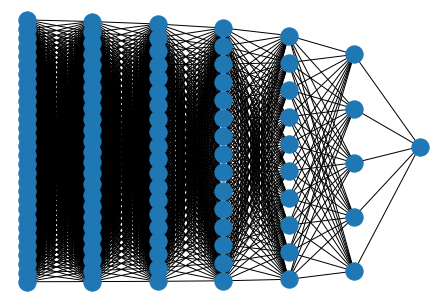

In [9]:
class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))            
        nx.draw(Q, pos = ps)
        
        
n_x = df_x_train_norm.shape[1] 
n_h2= 25
n_h3= 20
n_h4= 15
n_h5= 10
n_h6= 5
n_y = df_y_train_norm.shape[1]
    
layers = [n_x,n_h2,n_h3,n_h4,n_h5,n_h6, n_y]
net = Network(layers)
net.graph(layers)

<font color='RED'>
    
# MODELO

In [10]:
linear_model_2 = Sequential()

###QUINTA CAPA
linear_model_2.add(Dense(n_h2,  kernel_initializer='he_uniform',\
                      bias_initializer='RandomUniform',input_dim=n_x, activation='linear'))
###QUINTA CAPA
linear_model_2.add(Dense(n_h3,  kernel_initializer='he_uniform',\
                      bias_initializer='RandomUniform', activation='softmax'))
###QUINTA CAPA
linear_model_2.add(Dense(n_h4,  kernel_initializer='he_uniform',\
                      bias_initializer='RandomUniform', activation='relu'))
###QUINTA CAPA
linear_model_2.add(Dense(n_h5,  kernel_initializer='he_uniform',\
                      bias_initializer='RandomUniform', activation='linear'))
###Sexta capa CAPA
linear_model_2.add(Dense(n_h6,  kernel_initializer='he_uniform',\
                      bias_initializer='RandomUniform', activation='sigmoid'))


### CAPA DE SALIDA
linear_model_2.add(Dense(n_y,  kernel_initializer='he_uniform',\
                         bias_initializer='RandomUniform', activation='linear')) 

In [11]:
linear_model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
____________________________________________________

<font color='RED'>
    
# COMPILACIÓN

In [12]:
adm = optimizers.Adamax(learning_rate=0.04, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")
#adm = optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
linear_model_2.compile(loss='mean_squared_error', optimizer=adm)

<font color='RED'>
    
# ENTRENAMIENTO

In [13]:
validation_portion = 0.7
epochs = 700

history = linear_model_2.fit(df_x_train_norm, df_y_train_norm, epochs=epochs, validation_split = validation_portion, verbose=1)


Train on 2941 samples, validate on 6865 samples
Epoch 1/700
2941/2941 [==============================] - 0s 129us/step - loss: 1.0392 - val_loss: 0.9999
Epoch 2/700
2941/2941 [==============================] - 0s 77us/step - loss: 1.0056 - val_loss: 1.0067
Epoch 3/700
2941/2941 [==============================] - 0s 77us/step - loss: 1.0055 - val_loss: 1.0282
Epoch 4/700
2941/2941 [==============================] - 0s 80us/step - loss: 1.0050 - val_loss: 1.0056
Epoch 5/700
2941/2941 [==============================] - 0s 91us/step - loss: 1.0101 - val_loss: 1.0060
Epoch 6/700
2941/2941 [==============================] - 0s 143us/step - loss: 0.9999 - val_loss: 1.0001
Epoch 7/700
2941/2941 [==============================] - 1s 171us/step - loss: 1.0032 - val_loss: 1.0087
Epoch 8/700
2941/2941 [==============================] - 0s 133us/step - loss: 0.9978 - val_loss: 1.0074
Epoch 9/700
2941/2941 [==============================] - 0s 112us/step - loss: 1.0021 - val_loss: 1.0225
Epoch 10/7

2941/2941 [==============================] - 0s 89us/step - loss: 0.9007 - val_loss: 1.0944
Epoch 77/700
2941/2941 [==============================] - 0s 78us/step - loss: 0.9033 - val_loss: 1.1014
Epoch 78/700
2941/2941 [==============================] - 0s 79us/step - loss: 0.8999 - val_loss: 1.1430
Epoch 79/700
2941/2941 [==============================] - 0s 84us/step - loss: 0.8975 - val_loss: 1.1290
Epoch 80/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.9185 - val_loss: 1.0724
Epoch 81/700
2941/2941 [==============================] - 0s 79us/step - loss: 0.9131 - val_loss: 1.1031
Epoch 82/700
2941/2941 [==============================] - 0s 78us/step - loss: 0.9139 - val_loss: 1.1107
Epoch 83/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.9143 - val_loss: 1.0957
Epoch 84/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8991 - val_loss: 1.0964
Epoch 85/700
2941/2941 [==============================] - 0s 76us/st

2941/2941 [==============================] - 0s 79us/step - loss: 0.8665 - val_loss: 1.1436
Epoch 154/700
2941/2941 [==============================] - 0s 78us/step - loss: 0.8586 - val_loss: 1.1688
Epoch 155/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8744 - val_loss: 1.1463
Epoch 156/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8677 - val_loss: 1.1403
Epoch 157/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8728 - val_loss: 1.1389
Epoch 158/700
2941/2941 [==============================] - 0s 78us/step - loss: 0.8606 - val_loss: 1.1748
Epoch 159/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8760 - val_loss: 1.1390
Epoch 160/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8555 - val_loss: 1.1654
Epoch 161/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8714 - val_loss: 1.1478
Epoch 162/700
2941/2941 [==============================] - 0

2941/2941 [==============================] - 0s 88us/step - loss: 0.8536 - val_loss: 1.1591
Epoch 231/700
2941/2941 [==============================] - 0s 93us/step - loss: 0.8518 - val_loss: 1.1568
Epoch 232/700
2941/2941 [==============================] - 0s 93us/step - loss: 0.8567 - val_loss: 1.1709
Epoch 233/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8488 - val_loss: 1.1365
Epoch 234/700
2941/2941 [==============================] - 0s 92us/step - loss: 0.8579 - val_loss: 1.1451
Epoch 235/700
2941/2941 [==============================] - 0s 109us/step - loss: 0.8716 - val_loss: 1.1235
Epoch 236/700
2941/2941 [==============================] - 1s 187us/step - loss: 0.8523 - val_loss: 1.1543
Epoch 237/700
2941/2941 [==============================] - 0s 142us/step - loss: 0.8596 - val_loss: 1.1552
Epoch 238/700
2941/2941 [==============================] - 0s 95us/step - loss: 0.8731 - val_loss: 1.1462
Epoch 239/700
2941/2941 [==============================] 

2941/2941 [==============================] - 0s 80us/step - loss: 0.8324 - val_loss: 1.2028
Epoch 308/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8284 - val_loss: 1.2078
Epoch 309/700
2941/2941 [==============================] - 0s 84us/step - loss: 0.8316 - val_loss: 1.1717
Epoch 310/700
2941/2941 [==============================] - 0s 74us/step - loss: 0.8335 - val_loss: 1.1519
Epoch 311/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8355 - val_loss: 1.1377
Epoch 312/700
2941/2941 [==============================] - 0s 87us/step - loss: 0.8390 - val_loss: 1.1382
Epoch 313/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8421 - val_loss: 1.1863
Epoch 314/700
2941/2941 [==============================] - 0s 80us/step - loss: 0.8518 - val_loss: 1.1645
Epoch 315/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8469 - val_loss: 1.1743
Epoch 316/700
2941/2941 [==============================] - 0

2941/2941 [==============================] - 0s 95us/step - loss: 0.8339 - val_loss: 1.1572
Epoch 385/700
2941/2941 [==============================] - 0s 80us/step - loss: 0.8562 - val_loss: 1.1266
Epoch 386/700
2941/2941 [==============================] - 0s 85us/step - loss: 0.8444 - val_loss: 1.1505
Epoch 387/700
2941/2941 [==============================] - 0s 78us/step - loss: 0.8440 - val_loss: 1.1569
Epoch 388/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8441 - val_loss: 1.1314
Epoch 389/700
2941/2941 [==============================] - 0s 78us/step - loss: 0.8382 - val_loss: 1.1532
Epoch 390/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8499 - val_loss: 1.1699
Epoch 391/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8456 - val_loss: 1.1783
Epoch 392/700
2941/2941 [==============================] - 0s 84us/step - loss: 0.8395 - val_loss: 1.1706
Epoch 393/700
2941/2941 [==============================] - 0

2941/2941 [==============================] - 0s 78us/step - loss: 0.8422 - val_loss: 1.1684
Epoch 462/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8370 - val_loss: 1.1456
Epoch 463/700
2941/2941 [==============================] - 0s 87us/step - loss: 0.8461 - val_loss: 1.1481
Epoch 464/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8374 - val_loss: 1.1957
Epoch 465/700
2941/2941 [==============================] - 0s 79us/step - loss: 0.8392 - val_loss: 1.1681
Epoch 466/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8293 - val_loss: 1.1879
Epoch 467/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8303 - val_loss: 1.1420
Epoch 468/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8368 - val_loss: 1.1725
Epoch 469/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8341 - val_loss: 1.1916
Epoch 470/700
2941/2941 [==============================] - 0

2941/2941 [==============================] - 0s 78us/step - loss: 0.8449 - val_loss: 1.1531
Epoch 539/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8433 - val_loss: 1.1831
Epoch 540/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8405 - val_loss: 1.1757
Epoch 541/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8438 - val_loss: 1.1536
Epoch 542/700
2941/2941 [==============================] - 0s 75us/step - loss: 0.8473 - val_loss: 1.1772
Epoch 543/700
2941/2941 [==============================] - 0s 74us/step - loss: 0.8501 - val_loss: 1.1733
Epoch 544/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8431 - val_loss: 1.1950
Epoch 545/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8340 - val_loss: 1.1879
Epoch 546/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8332 - val_loss: 1.1906
Epoch 547/700
2941/2941 [==============================] - 0

2941/2941 [==============================] - 0s 78us/step - loss: 0.8216 - val_loss: 1.1859
Epoch 616/700
2941/2941 [==============================] - 0s 77us/step - loss: 0.8318 - val_loss: 1.1993
Epoch 617/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8269 - val_loss: 1.1928
Epoch 618/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8300 - val_loss: 1.1970
Epoch 619/700
2941/2941 [==============================] - 0s 122us/step - loss: 0.8249 - val_loss: 1.1936
Epoch 620/700
2941/2941 [==============================] - 0s 169us/step - loss: 0.8491 - val_loss: 1.1652
Epoch 621/700
2941/2941 [==============================] - 0s 153us/step - loss: 0.8363 - val_loss: 1.1874
Epoch 622/700
2941/2941 [==============================] - 0s 96us/step - loss: 0.8413 - val_loss: 1.1537
Epoch 623/700
2941/2941 [==============================] - 0s 101us/step - loss: 0.8408 - val_loss: 1.1957
Epoch 624/700
2941/2941 [==============================]

2941/2941 [==============================] - 0s 78us/step - loss: 0.8122 - val_loss: 1.1847
Epoch 693/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8127 - val_loss: 1.1919
Epoch 694/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8075 - val_loss: 1.1912
Epoch 695/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8129 - val_loss: 1.1892
Epoch 696/700
2941/2941 [==============================] - 0s 72us/step - loss: 0.8084 - val_loss: 1.1970
Epoch 697/700
2941/2941 [==============================] - 0s 74us/step - loss: 0.8128 - val_loss: 1.1780
Epoch 698/700
2941/2941 [==============================] - 0s 73us/step - loss: 0.8131 - val_loss: 1.2153
Epoch 699/700
2941/2941 [==============================] - 0s 72us/step - loss: 0.8228 - val_loss: 1.1661
Epoch 700/700
2941/2941 [==============================] - 0s 76us/step - loss: 0.8167 - val_loss: 1.1914


<font color='RED'>
    
# GRÁFICA

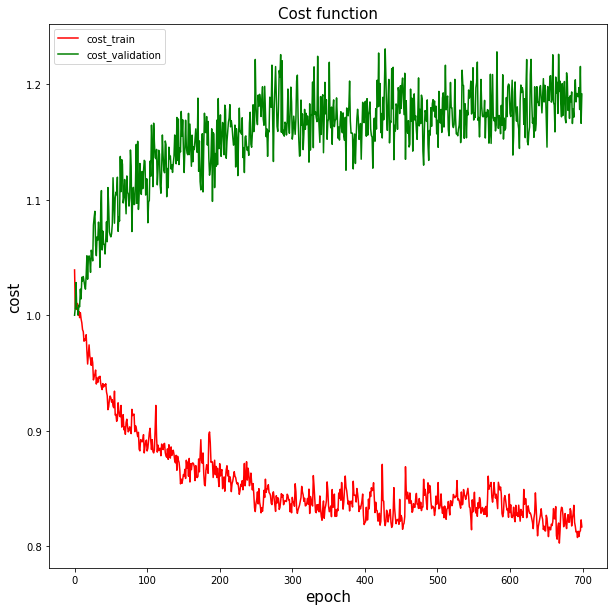

In [14]:
plt.figure(figsize=(10, 10))

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('Cost function', size=15)
plt.ylabel('cost', size=15)
plt.xlabel('epoch', size=15)
plt.legend(['cost_train', 'cost_validation'])
plt.show()

<font color='RED'>
    
# Evaluación con conjunto de prueba

In [15]:
evaluations = linear_model_2.evaluate(x = df_x_test_norm, y = df_y_test_norm)
t = PrettyTable(['Loss'])
t.add_row([round(evaluations,5)])
print(t)

2452/2452 [==============================] - 0s 17us/step
+---------+
|   Loss  |
+---------+
| 1.16107 |
+---------+


In [17]:
sample=400
print(df_y_test_norm[sample:sample+1]*df_y_test.std()+df_y_test.mean())
flat_y = list(df_y_test_norm['Cambio(%) 1_dia'])

#ETIQUETA
print('La muestra #', sample, 'corresponde ', round(flat_y[sample]*df_y_test.std()+df_y_test.mean(),2))

#PREDICCION
predictions = linear_model_2.predict(df_x_test_norm)
prediction =predictions[sample]
print('Para la muestra #', sample, 'la predicción es = ', round(prediction*df_y_test.std()+df_y_test.mean(),0))

       Cambio(%) 1_dia
11741              1.0
La muestra # 400 corresponde  Cambio(%) 1_dia    1.0
dtype: float64
Para la muestra # 400 la predicción es =  Cambio(%) 1_dia   -0.0
dtype: float64
